# Visualización de datos

Basados en libro *Storytelling with data – Wiley*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re

#### Bar Chart

In [2]:
data_fig = pd.DataFrame({'type':['Bored' , 'Not great', 'Ok', 'Kind of interested', 'Excited'],
                         'Percent_pre': [ 0.11, 0.05,  0.4,  0.25, 0.19],
                         'Percent_post': [ 0.12, 0.06, 0.14 , 0.30,  0.38 ] })
data_fig = data_fig.set_index('type')
data_fig

,Percent_pre,Percent_post
type,,
Bored,0.11,0.12
Not great,0.05,0.06
Ok,0.40,0.14
Kind of interested,0.25,0.30
Excited,0.19,0.38


In [3]:
import matplotlib.pyplot as plt

def plot_figure(data):
    
    _, ax = plt.subplots(figsize = (8, 4))
    
    columns = list(data.columns)

    xticks = np.arange(0, data.shape[0])
    w = 0.5
    for col in columns:
        
        values = data[col].values
        colorpre = [(0,0, 0, 0.5) if x>=0.4 else (0,0, 0, 0.3) for x in values ]
        colorpost = [(0,0.2, 0.56, 0.6) if x>=0.3 else (0, 0.2, 0.56, 0.3) for x in values ]
        colors = colorpre if re.search('pre' ,col, re.I) else colorpost
        xticks_new = xticks - (w - 0.1)/2 if re.search('pre' ,col, re.I) else xticks + (w - 0.1)/2
        
        ax.bar(xticks_new, values, w-0.1, color = colors)
         
        for val_col, xt in zip(values, xticks_new):
            ax.text(xt, val_col-0.029,  str(int(val_col*100)) + '%', fontsize=10 , 
                color = 'white', 
                horizontalalignment='center' )

    ax.set_ylim((0, 0.6))
    ax.set_xticks(np.arange(0, 5))
    
    ax.set_xticklabels(['Bored', 'Not great', 'Ok', 'Kind of \n interested', 'Excited'],
                      fontdict ={'fontsize':12})

    ax.set_title('How do you feel about data science?', 
                 fontdict = {'fontsize':15}, 
                loc = 'left',
                pad = 11)

    ax.text(-0.5, 0.48, 
            'BEFORE program, the\nmajority of children felt\njust OK about science', 
            fontdict ={'fontsize':11})

    ax.text( 4.60, 0.06, 
            'AFTER\nprogram,\nmore children\nwere Kind of\ninterested &\nExcited about\nscience.\n', 
            fontdict ={'fontsize':11, 'color': (0,0.2, 0.56, 0.6) })

    ax.set_facecolor('white')
    ax.tick_params( left=False, bottom=False, labelleft=False,)
    spines = ['left', 'right', 'top', 'bottom']
    for spine in spines:
            ax.spines[spine].set_color('white')
    
    return ax

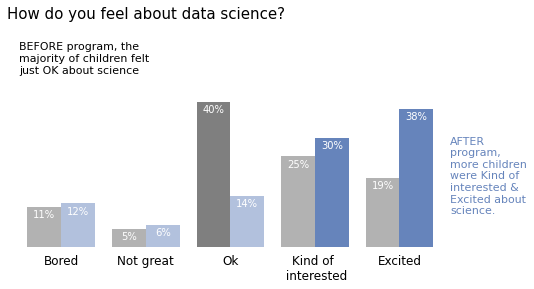

In [4]:
plot_figure(data_fig)
plt.show()

#### Stacked bar

In [5]:
df_fig = pd.DataFrame({'segment':['Segment 1' , 'Segment 2', 'Segment 3', 'Segment 4', 'Segment 5', 'Segment 6', 'Segment 7'],
                         'population': [ 0.16, 0.07,  0.1,  0.1, 0.10, 0.32, 0.15],
                         'constumer': [ 0.09, 0.1, 0.15 , 0.18,  0.17, 0.2, 0.11 ] })
df_fig = df_fig.set_index('segment')
df_fig

,population,constumer
segment,,
Segment 1,0.16,0.09
Segment 2,0.07,0.10
Segment 3,0.10,0.15
Segment 4,0.10,0.18
Segment 5,0.10,0.17
Segment 6,0.32,0.20
Segment 7,0.15,0.11


[Text(0, 0, 'US Population'), Text(1, 0, 'Our Customers')]

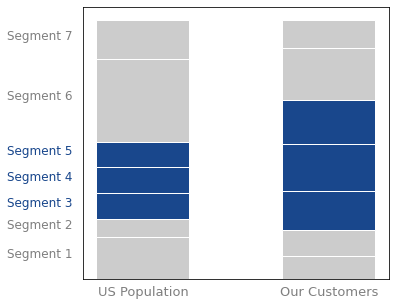

In [6]:
fig, ax = plt.subplots(figsize = (5.5, 5))
botoom_begin = np.array([0,0])
our_segment = ['Segment 3', 'Segment 4', 'Segment 5']
for name in df_fig.index:
    if name in our_segment:
        ax.bar(['US Population', 'Our Customers'], 
               df_fig.loc[name].values.tolist(), 
               width=0.5, 
               bottom = botoom_begin, 
               color = (0,0.2, 0.5, 0.9),
              edgecolor='white')
        botoom_begin = botoom_begin + df_fig.loc[name].values
    else :
        ax.bar(['US Population', 'Our Customers'], 
               df_fig.loc[name].values.tolist(), 
               width=0.5, 
               bottom = botoom_begin, 
               color = (0,0, 0, 0.2),
              edgecolor='white')
        botoom_begin = botoom_begin + df_fig.loc[name].values
        
ax.grid(False)
ax.set_facecolor('white')
x_v = [-0.73]*7
colors = [  (0,0.2, 0.5, 0.9) if name in our_segment else (0,0, 0, 0.5) for name in df_fig.index ]
yticks = np.nan_to_num(df_fig['population'].cumsum().rolling(2, win_type = 'triang').sum().values, nan=(0.16 + 0)/2) 

for x, y, txt, color in zip(x_v ,yticks, df_fig.index.tolist(), colors ):
    ax.text(x, y,  txt, fontsize=12 , 
            color = color,  )
ax.tick_params(left= False, bottom = False, labelleft = False)
ax.set_xticks([0, 1])
ax.set_xticklabels(['US Population', 'Our Customers'], fontsize = 13, color = (0, 0, 0, 0.5 ))

In [7]:
x_pop = [-0.07]*7
colors = [  'lightgrey' if name in our_segment else (0,0, 0, 0.4) for name in df_fig.index ]

yticks_pop = np.nan_to_num(df_fig['population'].cumsum().rolling(2, win_type = 'triang').sum().values, nan=(0.16 + 0)/2)

for x, y, txt, color in zip(x_pop ,yticks, df_fig['population'].values  , colors):
    ax.text(x, y,  str(int(txt*100)) + '%' , fontsize=11 , 
            color = color)
x_con = [0.95]*7    
yticks_con = np.nan_to_num(df_fig['constumer'].cumsum().rolling(2, win_type = 'triang').sum().values, nan=(0.09 + 0)/2)

for x, y, txt, color in zip(x_con ,yticks_con, df_fig['constumer'].values  , colors):
    ax.text(x, y,  str(int(txt*100)) + '%' , fontsize=11 , 
            color = color)
    
ax.text(-0.74, 1.08, 'Distribution by customer segment', fontsize = 15, color = (0, 0, 0, 0.6 ) )
ax.vlines(x = 0.28 , ymin = 0.23 , ymax = 0.53, colors=(0,0.2, 0.5, 0.9))
ax.text( 0.28 + 0.019, (0.23 + 0.53)/2 , '30%', fontsize = 15, color = (0,0.2, 0.5, 0.9) )
ax.vlines(x = 1.28 , ymin = 0.19 , ymax = 0.69, colors=(0,0.2, 0.5, 0.9))
ax.text(1.28 + 0.019, (0.19 + 0.69)/2, '50%', fontsize = 15, color = (0,0.2, 0.5, 0.9) )
spines = ['left', 'right', 'top', 'bottom']
for spine in spines:
        ax.spines[spine].set_color('white')

figura final: stacked bar 

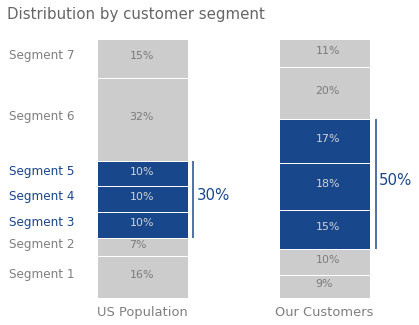

In [8]:
fig

In [9]:
df = pd.DataFrame({'quintil':['Lowest Quintile',
                              'Second Quintile', 'Middle Quintile',
                              'Fourt Quintile', '81st to 90th Percentiles',
                             '91st to 95th Percentiles', '96th to 99th Percentiles',
                             'Top 1 Percent'],
                   'wight':[0.2, 0.2, 0.2, 0.2, 0.1, 0.05, 0.035, 0.01, ],
                   'height': [3, 7, 11, 14, 17, 21, 40, 190 ]
                  })

In [10]:
loc = df.wight.cumsum().rolling(2, win_type = 'triang').sum()
loc[0]=(0+ 0.2) /2

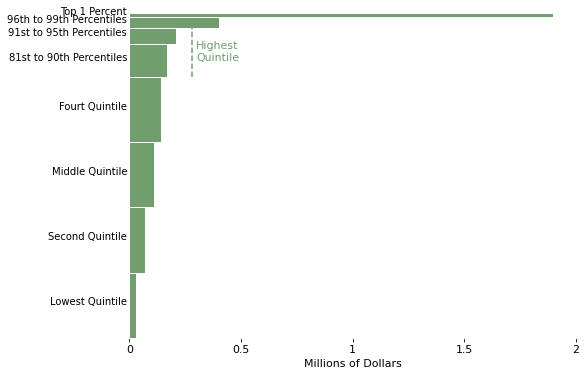

In [11]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.barh(loc.values , height= df.wight.values,
               width=df.height.values, 
               color = (0.19,0.45, 0.17, 0.69),
       edgecolor='white')

ax.set_ylim(0,1)
for y, txt in zip( loc.values, df.quintil.values):
    ax.text(-1, y,  txt, fontsize=10, horizontalalignment = 'right' )
ax.tick_params(left=False, labelleft = False)
ax.set_xlabel('Millions of Dollars', size = 11)
ax.text(30, 0.85, 'Highest\nQuintile', color = (0.19,0.45, 0.17, 0.69), fontsize = 11)
ax.vlines(x =30-2 , ymin = 0.800 , ymax = 0.95, colors=(0.19,0.45, 0.17, 0.69), linestyles = 'dashed')
ax.set_xticks([0, 50, 100, 150 ,200])
ax.set_xticklabels([0, 0.5, 1, 1.5, 2], size = 11)
spines = ['left', 'right', 'top', 'bottom']
for spine in spines:
        ax.spines[spine].set_color('white')
plt.show()

In [12]:
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\python_course\Projects\data_visual.txt', sep = '\t', index_col=0)
df = df.applymap(lambda x:x.replace('%', ''))
df = df.astype(float)
df = df.drop(columns=['Total']).copy()

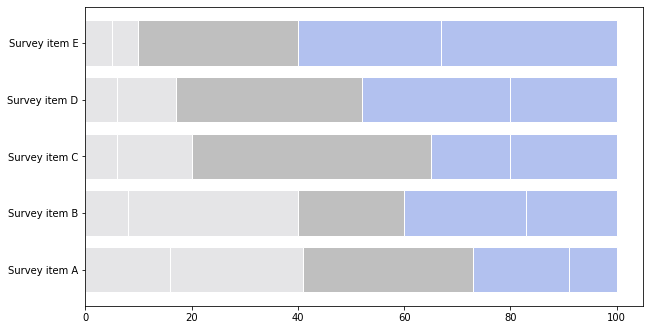

In [13]:
fig, ax = plt.subplots(figsize=(10, 5.5))


features = df.index.tolist()
features.reverse()
base = np.array([0]*5)
for x in df.columns:
    if x in ['Strongly Disagree', 'Disagree']:
        values = df[x].values.tolist()
        values.reverse()
        ax.barh(features, values, color = (0, 0, 0.1, 0.1), left = base, edgecolor = 'white'   )
        base = base + values 
    elif x in ['Neutral']:
        values = df[x].values.tolist()
        values.reverse()
        ax.barh(features, values, color = (0, 0.0, 0., 0.25), left = base, edgecolor = 'white'   )
        base = base + values
    elif x in ['Agree', 'Strongly Agree']:
        values = df[x].values.tolist()
        values.reverse()
        colors = [(0, 0.2, 0.5, 0.9) if i in [8, 9]  else (0, 0.2, 0.8, 0.3) for i in range(10) ]
        ax.barh(features, values, color = colors, left = base, edgecolor = 'white'   )
        base = base + values

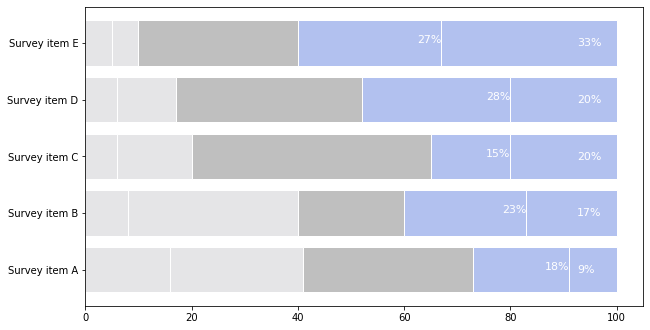

In [14]:
x_axis = df.cumsum(axis=1)
for name in ['Agree', 'Strongly Agree']:
    if name == 'Agree':
        values = df[name].values.tolist()
        values.reverse()
        #values = np.sort(values)

        x_v = x_axis[name].values.tolist()
        x_v.reverse()
        #x_V = np.sort(x_v)
        
        for txt,x,  y in zip(values,x_v,  range(0, 5)):
            ax.text(x, y, str(int(txt)) + '%', fontsize = 11, color= 'white', ha = 'right')
    else : 
        values = df[name].values.tolist()
        values.reverse()
       
        for txt, y in zip(values,  range(0, 5)):
            ax.text(94.5-2, y, str(int(txt)) + '%', fontsize = 11,color= 'white', va = 'center' )
fig

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6004\3337978514.py:1: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize = 12)


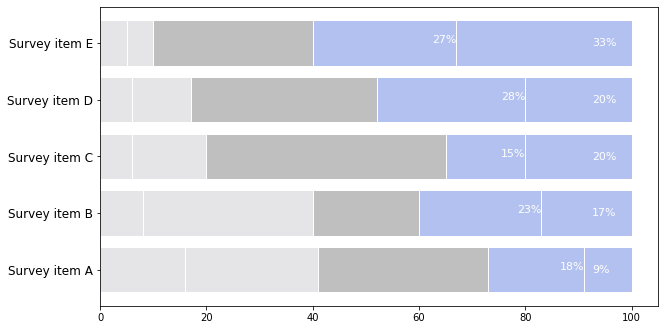

In [15]:
ax.set_yticklabels(ax.get_yticklabels(), fontsize = 12)
fig

In [16]:
for x, txt in zip([-10, 12, 36, 61, 85, 108],df.columns ):
    if txt in ['Agree', 'Strongly Agree']:
        ax.text(x, 5, txt, fontsize=12, ha = 'center', color = (0, 0.2, 0.5, 0.9), weight ='semibold')
    
    else :
        ax.text(x, 5,  txt, fontsize=12, ha = 'center', color = (0, 0, 0.1, 0.5))
    
ax.tick_params(left = False, bottom = False, labelbottom = False)

ax.text(104, 3.8, 'Features\nA and B\ncontinue\nto top user\nsatisfaction', fontsize = 12, color = 'white', 
        weight = 'semibold',
        bbox={'facecolor': (0, 0.2, 0.5, 0.9) , 'pad': 10, 'ec':'white' })
spines = ['left', 'right', 'top', 'bottom']
for spine in spines:
        ax.spines[spine].set_color('white')

figura final

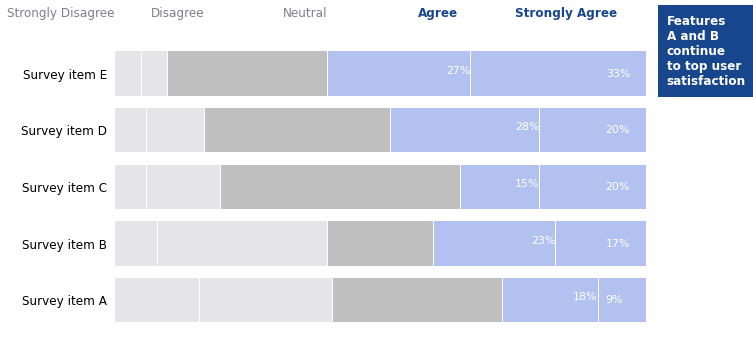

In [17]:
fig

#### Stacked Area 

In [18]:
np.random.seed(123)
Z = np.random.randint(1, 10, 40)
X = np.empty(len(Z))

df = pd.DataFrame({})
for i in [1.5, 0.3, 0.7, 2]:
    if i == 1.5:
        for t in range(len(Z)):
            X[t] = Z[t]**(0.8) + i*t
        df[i] = X     
    elif i == 0.3:
        for t in range(len(Z)):
            X[t] = Z[t]**(0.8) + i*t
        df[i] = X
    elif i == 0.7:
        for t in range(len(Z)):
            X[t] = Z[t]**(1.2) + i*t
        df[i] = X
    else :
        for t in range(len(Z)):
            X[t] = Z[t]**(1.5) + i*t
        df[i] = X 
df.index = pd.period_range(start='1978', end = '2017',freq ='y')

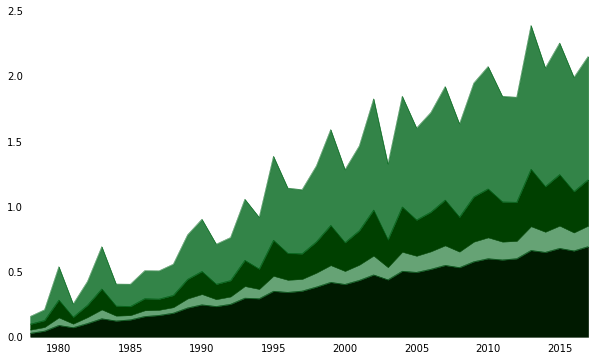

In [19]:
ax = df.plot(kind ='area', 
             color = [(0, 0.1, 0, 1), (0, 0.4, 0.1, 0.6), (0, 0.25, 0, 1), (0, 0.4, 0.1, 0.8)], 
             lw=0.5, 
             figsize=(10, 6), legend=False, grid =False, zorder = 3)

fig = ax.get_figure()

ax.set_ylim((0, 220))
ax.set_yticks(np.linspace(0,220, 6))
ax.set_yticklabels(np.linspace(0,2.5, 6))
ax.tick_params(which='both' , left =False, bottom = False) # tick is |, and in a ax there may be several ticks of different sizes 
spines = ['left', 'right', 'top', 'bottom']
for spine in spines:
        ax.spines[spine].set_color('white')

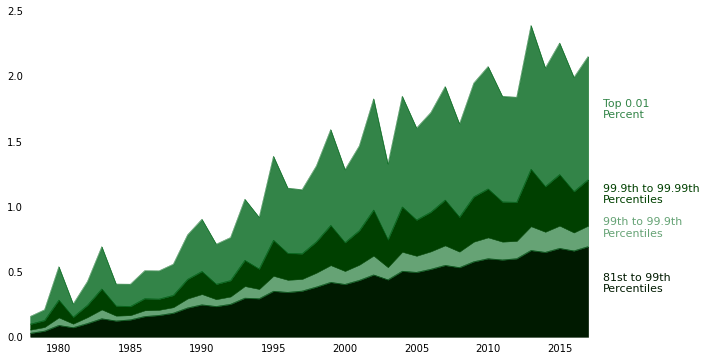

In [20]:
color_v = [(0, 0.1, 0, 1), (0, 0.4, 0.1, 0.6), (0, 0.25, 0, 1), (0, 0.4, 0.1, 0.8)]
txt_v = ['81st to 99th\nPercentiles', '99th to 99.9th\nPercentiles',
       '99.9th to 99.99th\nPercentiles', 'Top 0.01\nPercent']
y_v = df.loc['2017'].cumsum().rolling(2, win_type = 'triang').sum().values.tolist()
y_v[0]=60.908225/2
for  y, txt, color in zip(y_v, txt_v, color_v):
    ax.text('2018' ,y, txt, color = color, fontsize=11 )
fig

#### Time Series

In [21]:
def subplots():    
    
    fig, ax = plt.subplots(figsize = (10, 5))
    ax.tick_params(axis = 'both', direction = 'in', length = 5)
    ax.tick_params(which='minor', bottom = False, left=False)
    
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')
        
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color('k')    
        ax.spines[spine].set_linewidth(0.5)
        
    return fig, ax

In [22]:
np.random.seed(123)
Z = np.random.randint(1, 10, 20)
X = np.empty(len(Z))

df = pd.DataFrame({})
for i in [0.1, 0.6, 0.8]:
    for t in range(len(Z)):
        X[t] = Z[t] + i*t
    df[i] = X     
df.index = pd.period_range(start='2010', freq='y', periods=20)
df.columns = [ 'Middle Quintile','Second Quintile', 'Lowest Quintile']

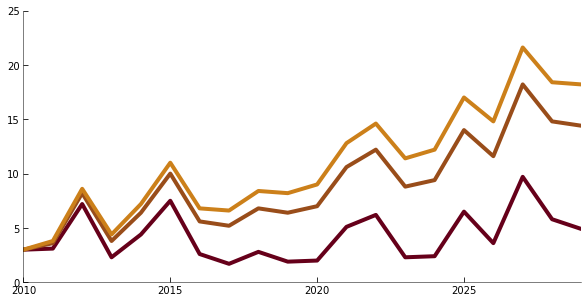

In [23]:
fig, ax = subplots()
colors = [(0.4, 0, 0.1), (0.6, 0.3, 0.1), (0.8, 0.5, 0.1)]
df.plot(ax = ax, color = colors, lw = 4, legend = False)
ax.set(yticks = [0, 5, 10, 15, 20, 25])
plt.show()

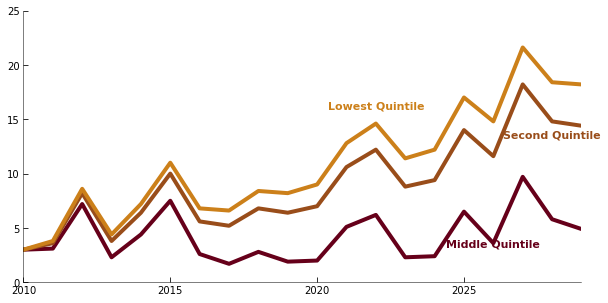

In [24]:
x_values = ['2026', '2028', '2022']
m = -0.1
for column, color, x in zip(df.columns, colors, x_values):
    if column == 'Lowest Quintile':
        m = 0.09
    ax.text(x, df.loc[x, column]*(1 + m), column, color = color, fontsize = 11, weight="bold", ha = 'center')
fig

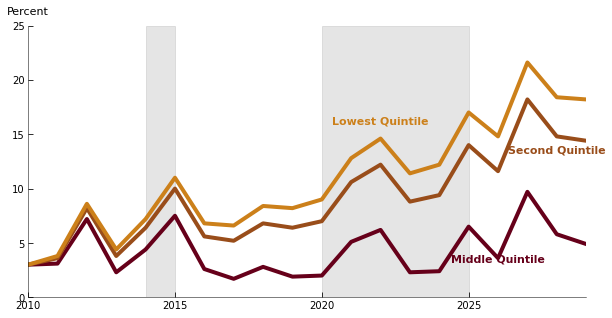

In [25]:
start_date = ['2014', '2020']
end_date = ['2015', '2025']
for s, e in zip(start_date , end_date):
    ax.axvspan(s, e, color='gray', alpha=0.2)    
ax.text('2010', 26 , "Percent", color='k', ha = 'center', fontsize = 11)
fig